In [60]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import seaborn as sns

In [61]:
df = pd.read_csv("data/coupons.csv")
df.replace(
    {"occupation": {"Education&Training&Library": "Education Training Library"}},
    inplace=True,
)

<div class="alert alert-block alert-success">
<h2>Occupation</h2>    
How may coupons were accepted across each occupation field?    
</div>

<div class="alert alert-block alert-info">
<h3>- Tabulate in each occupation category, how many have accepted the coupons in each of 5 category </h3>
Steps<br>
    1. Create a spearate DataFrame Group by 'occupation' and extract only fields 'occupation' and 'Y'<br>
    2. Aggregate Sum and Size<br>
    3. Pipe it to find percentage<br>
    4. Sort values on descending order of percentage<br>
    5 In loop repeat step 1-3 for 5 options and calculate sum, size and percentage of each. In process, concat the result to results obtained in previous iteration.<br>
</div>

In [62]:
def custom_func(group):
    # group["percentage"] = (group[("Y", "sum")] / group[("Y", "size")] * 100).round(2)
    group["percentage"] = (group["_sum"] / group["_size"] * 100).round(2)
    return group


overall = df.groupby("occupation")

overall = (
    overall[["occupation", "Y"]]
    .agg(
        _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
        _size=pd.NamedAgg(column="Y", aggfunc="size"),
    )
    .pipe(custom_func)
    .sort_values("percentage", ascending=False)
    .rename(columns={"percentage": "_percentage"})
)

coupons = [
    "Bar",
    "CoffeeHouse",
    "CarryAway",
    "RestaurantLessThan20",
    "Restaurant20To50",
]
heading = ["bar", "cafe", "togo", "r20", "r50"]

for ctr, coupon in enumerate(coupons):
    temp_df = (
        df[df[coupon] != "never"]
        .groupby("occupation")[["occupation", "Y"]]
        .agg(
            _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
            _size=pd.NamedAgg(column="Y", aggfunc="size"),
        )
        .pipe(custom_func)
        .rename(
            columns={
                "_sum": heading[ctr] + "_sum",
                "_size": heading[ctr] + "_size",
                "percentage": heading[ctr] + "_percent",
            }
        )
    )
    overall = pd.concat([overall, temp_df], axis=1)

<div class="alert alert-block alert-info">
- From all the information focus on the top 1/2 of occupation who have accepted coupons. <br>
</div>

In [63]:
top50 = (
    overall[["_sum"]]
    .sort_values(by="_sum", ascending=False)
    .iloc[0 : int(len(overall) / 2)]
)

In [64]:
top_50_overall = pd.merge(left=top50.drop(columns=["_sum"]), right=overall, on="occupation")

In [65]:
(top_50_overall[["_sum"]].sum() / overall[["_sum"]].sum() * 100).round(0).values[0]

np.float64(83.0)

<div class="alert alert-block alert-warning">
- As per above analysis 83% of coupons are accepted by top 50% of sorted occupation category <br>
<h3>This helps us focus on 50% of occupation which gets us 83% of business.</h3>    
</div>

In [66]:
# For Readibility, Replace long string  in index with 1st word of each index
plotdata=top_50_overall
plotdata.index = plotdata.index.str.split(" ").str[0]
plotdata

,_sum,_size,_percentage,bar_sum,bar_size,bar_percent,cafe_sum,cafe_size,cafe_percent,togo_sum,togo_size,togo_percent,r20_sum,r20_size,r20_percent,r50_sum,r50_size,r50_percent
occupation,,,,,,,,,,,,,,,,,,
Unemployed,1025,1870,54.81,563,936,60.15,825,1408,58.59,1025,1870,54.81,1016,1848,54.98,823,1458,56.45
Student,967,1584,61.05,527,835,63.11,832,1321,62.98,935,1540,60.71,926,1518,61.00,793,1276,62.15
Computer,798,1408,56.68,529,905,58.45,700,1145,61.14,785,1386,56.64,798,1408,56.68,700,1210,57.85
Sales,615,1093,56.27,361,587,61.50,452,742,60.92,604,1071,56.40,615,1093,56.27,482,851,56.64
Education,494,943,52.39,271,505,53.66,398,723,55.05,494,943,52.39,494,943,52.39,438,855,51.23
Management,493,838,58.83,402,642,62.62,417,664,62.80,483,816,59.19,484,816,59.31,435,738,58.94
Office,384,639,60.09,285,462,61.69,265,419,63.25,384,639,60.09,365,617,59.16,309,507,60.95
Arts,326,629,51.83,208,371,56.06,276,503,54.87,317,607,52.22,316,607,52.06,247,477,51.78
Business,310,544,56.99,236,412,57.28,300,522,57.47,310,544,56.99,310,544,56.99,266,456,58.33


<div class="alert alert-block alert-info">
<h3>Plot Graph to see how top 50% occupation coupon preference
</div>

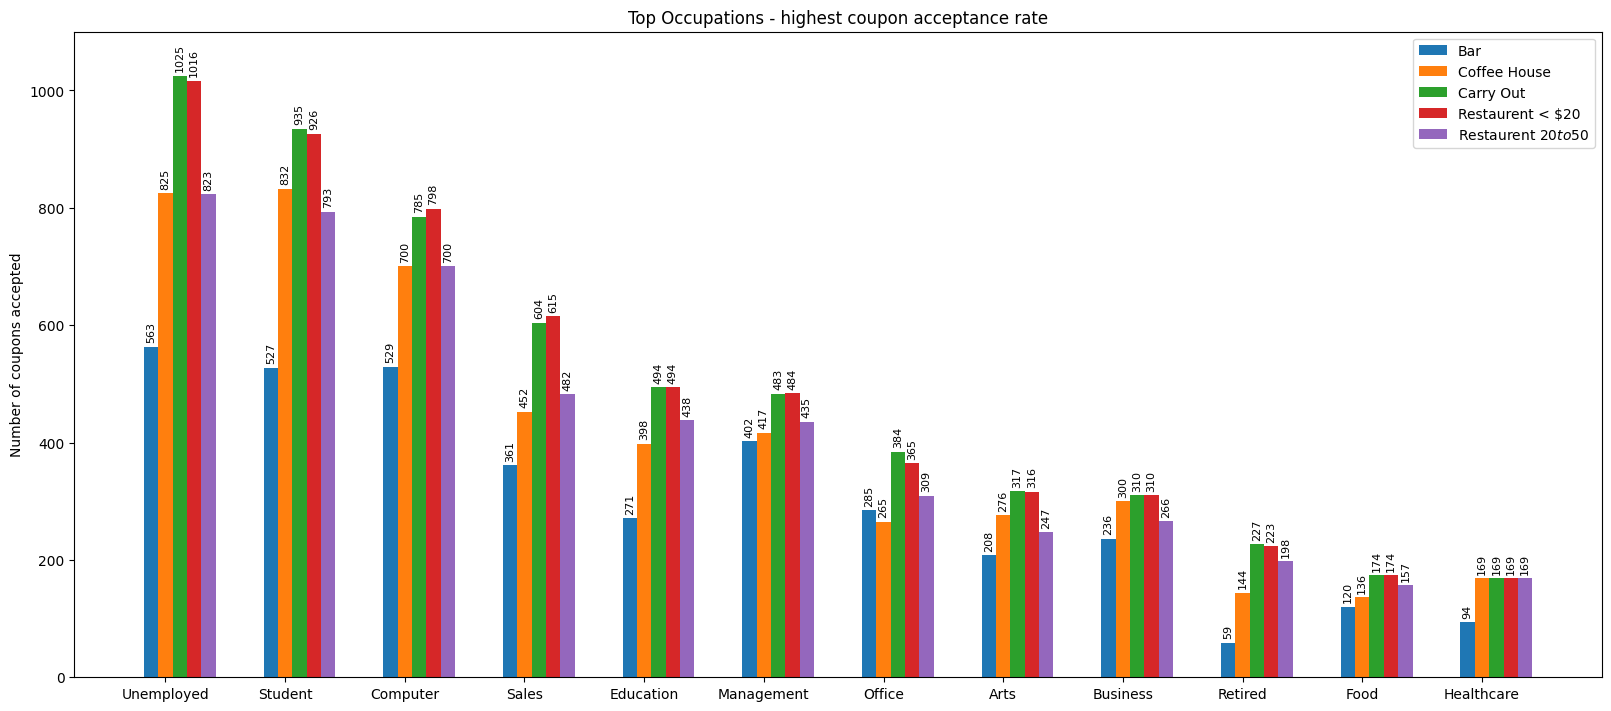

<Figure size 640x480 with 0 Axes>

In [67]:
eateries = ["bar_sum", "cafe_sum", "togo_sum", "r20_sum", "r50_sum"]
eateries_label = ["Bar", "Coffee House", "Carry Out", "Restaurent < $20", "Restaurent $20 to $50"]
colors = list(mcolors.TABLEAU_COLORS.keys())
width = 0.12

x = np.arange(len(plotdata.index))  

fig, ax = plt.subplots(layout="constrained", figsize=(16, 7))

for counter, eatery in enumerate(eateries):
    offset = width * counter    
    rects = ax.bar(x + offset, plotdata[eatery], width, label=eateries_label[counter], color=colors[counter])
    ax.bar_label(rects, padding=3, fontsize=8, rotation=90)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Number of coupons accepted")
ax.set_title("Top Occupations - highest coupon acceptance rate")
ax.set_xticks(x + width, plotdata.index)
ax.legend(loc="upper right", ncols=1)
ax.set_ylim(0, 1100)
plt.show()

plt.savefig("output/Occupation_HightestCoupons.png")

<div class="alert alert-block alert-info">
<h3>Plot Graph to look at what what percent of to 50% accept coupons. Why is this important?</h3>
To get 83% of business, how many coupons need to be rolled out. (per category)    
</div>

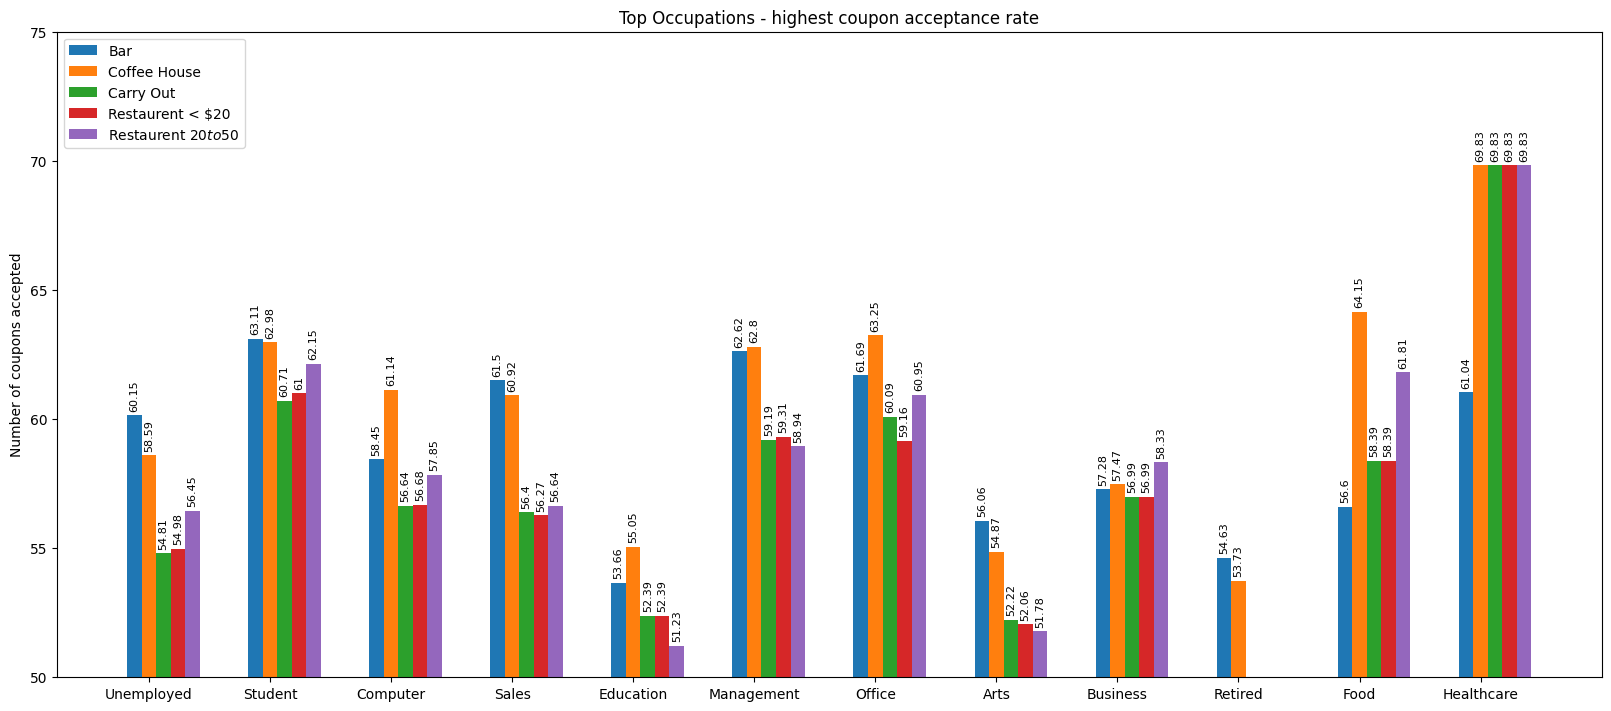

<Figure size 640x480 with 0 Axes>

In [68]:
eateries = [x for x in top_50_overall.columns if '_percent' in x][1:]
eateries_label = ["Bar", "Coffee House", "Carry Out", "Restaurent < $20", "Restaurent $20 to $50"]
colors = list(mcolors.TABLEAU_COLORS.keys())
width = 0.12

x = np.arange(len(plotdata.index))  

fig, ax = plt.subplots(layout="constrained", figsize=(16, 7))
for counter, eatery in enumerate(eateries):
    offset = width * counter    
    rects = ax.bar(x + offset, plotdata[eatery], width, label=eateries_label[counter], color=colors[counter])
    ax.bar_label(rects, padding=3, fontsize=8, rotation=90)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Number of coupons accepted")
ax.set_title("Top Occupations - highest coupon acceptance rate")
ax.set_xticks(x + width, plotdata.index)
ax.legend(loc="upper left", ncols=1)
ax.set_ylim(50, 75)
plt.show()

plt.savefig("output/Occupation_HightestCoupons_percentage.png")

In [69]:
top_50_info = (
    top_50_overall[[x for x in top_50_overall.columns if "percent" in x]]
    .describe()
    .round(2)
)
top_50_info.loc["mean"].mean().round(2)

np.float64(58.01)

<div class="alert alert-block alert-warning">
<h4>It is evident from graph and calculation that around 58% of them accept coupons</h4>    
</div>

In [70]:
heading = ["bar", "cafe", "togo", "r20", "r50"]
highest_acceptance = overall["_percentage"].sort_values(ascending=False).iloc[0:5]
highest_acceptance
highest_acceptance = pd.concat(
    [
        overall[head + "_percent"].sort_values(ascending=False).iloc[0:5]
        for head in heading
    ],
    axis=1,
)
highest_acceptance

,bar_percent,cafe_percent,togo_percent,r20_percent,r50_percent
occupation,,,,,
Farming Fishing & Forestry,72.73,72.73,72.73,NaN,72.73
Healthcare Practitioners & Technical,66.88,69.37,67.62,71.62,71.62
Construction & Extraction,65.91,84.85,68.83,68.83,68.83
Architecture & Engineering,63.64,NaN,NaN,63.43,NaN
Student,63.11,NaN,NaN,NaN,NaN
Healthcare Support,NaN,69.83,69.83,69.83,69.83
Protective Service,NaN,67.89,64.57,64.57,64.57


In [58]:
highest_acceptance.describe().loc["mean"].mean().round(2)

np.float64(69.06)

<div class="alert alert-block alert-warning">
<h4>Focusing on the above listed categories will lead to highest acceptance rate.</h4>    
- Even though the studens make it top 5 in acceptance category of bar, we kind of want to avoid going there.
</div>

In [382]:
top_50_overall

,_sum,_size,_percentage,bar_sum,bar_size,bar_percent,cafe_sum,cafe_size,cafe_percent,togo_sum,togo_size,togo_percent,r20_sum,r20_size,r20_percent,r50_sum,r50_size,r50_percent
occupation,,,,,,,,,,,,,,,,,,
Unemployed,1025,1870,54.81,563,936,60.15,825,1408,58.59,1025,1870,54.81,1016,1848,54.98,823,1458,56.45
Student,967,1584,61.05,527,835,63.11,832,1321,62.98,935,1540,60.71,926,1518,61.00,793,1276,62.15
Computer & Mathematical,798,1408,56.68,529,905,58.45,700,1145,61.14,785,1386,56.64,798,1408,56.68,700,1210,57.85
Sales & Related,615,1093,56.27,361,587,61.50,452,742,60.92,604,1071,56.40,615,1093,56.27,482,851,56.64
Education Training Library,494,943,52.39,271,505,53.66,398,723,55.05,494,943,52.39,494,943,52.39,438,855,51.23
Management,493,838,58.83,402,642,62.62,417,664,62.80,483,816,59.19,484,816,59.31,435,738,58.94
Office & Administrative Support,384,639,60.09,285,462,61.69,265,419,63.25,384,639,60.09,365,617,59.16,309,507,60.95
Arts Design Entertainment Sports & Media,326,629,51.83,208,371,56.06,276,503,54.87,317,607,52.22,316,607,52.06,247,477,51.78
Business & Financial,310,544,56.99,236,412,57.28,300,522,57.47,310,544,56.99,310,544,56.99,266,456,58.33


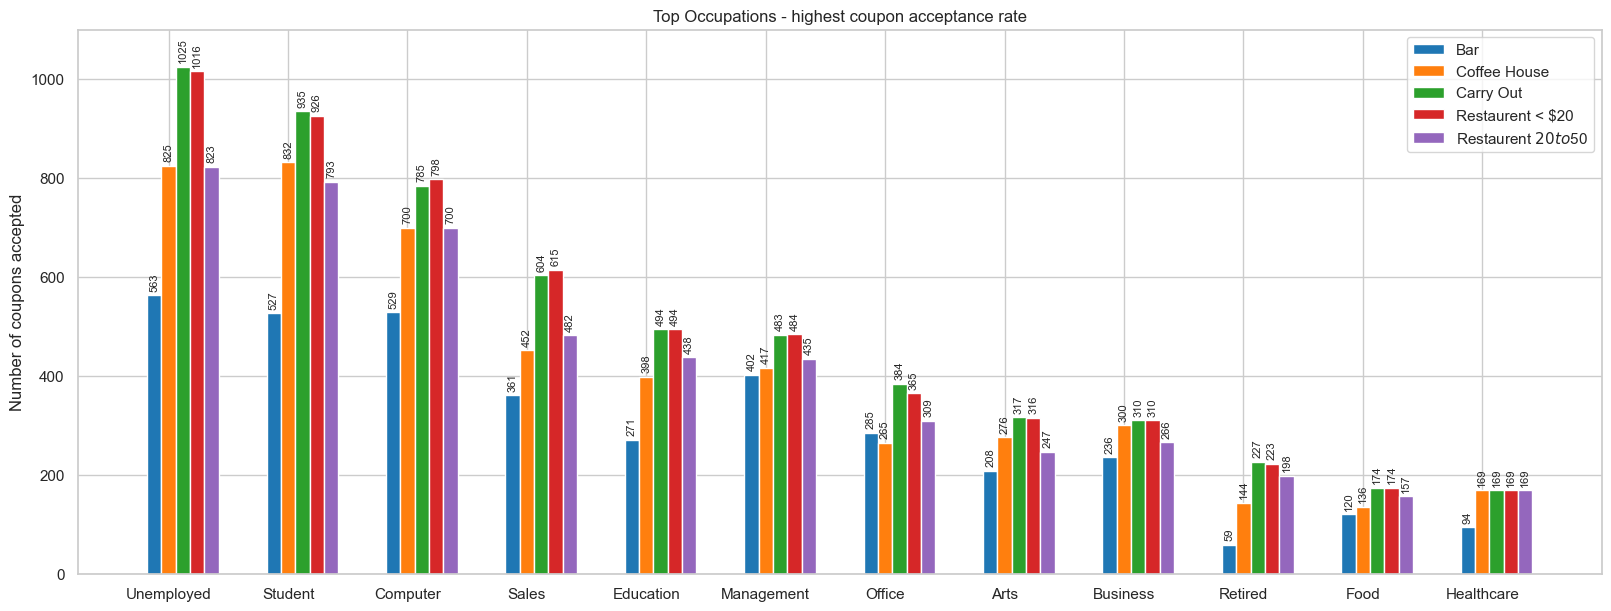

In [374]:
eateries = ["bar_sum", "cafe_sum", "togo_sum", "r20_sum", "r50_sum"]
eateries_label = ["Bar", "Coffee House", "Carry Out", "Restaurent < $20", "Restaurent $20 to $50"]
colors = list(mcolors.TABLEAU_COLORS.keys())
width = 0.12

x = np.arange(len(plotdata.index))  # the label locations

fig, ax = plt.subplots( layout="constrained", figsize=(16, 6))

for counter, eatery in enumerate(eateries):
    offset = width * counter    
    rects = ax.bar(x + offset, plotdata[eatery], width, label=eateries_label[counter], color=colors[counter])
    ax.bar_label(rects, padding=3, fontsize=8, rotation=90)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Number of coupons accepted")
ax.set_title("Top Occupations - highest coupon acceptance rate")
ax.set_xticks(x + width, plotdata.index)
ax.legend(loc="upper right", ncols=1)
ax.set_ylim(0, 1100)
plt.savefig("output/Occupation_Eatery.png")
plt.show()